In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df_irrigacao = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [158]:
df_irrigacao

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
...,...,...,...
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667


In [159]:
df_irrigacao.columns = ['horas_irrigacao', 'area_irrigada', 'area_irrigada_angulo']

In [160]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   horas_irrigacao       299 non-null    int64  
 1   area_irrigada         299 non-null    int64  
 2   area_irrigada_angulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [161]:
df_irrigacao.describe()

,horas_irrigacao,area_irrigada,area_irrigada_angulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


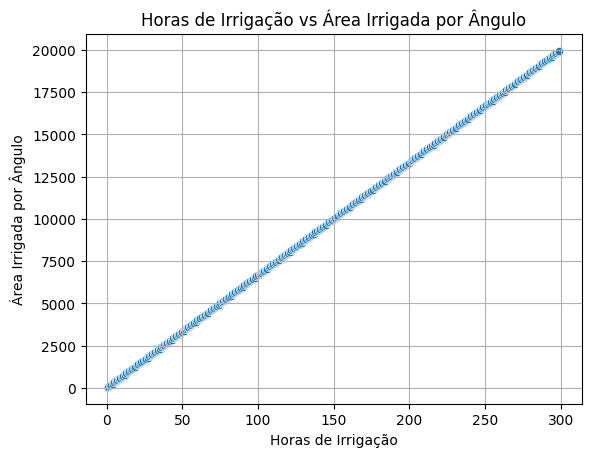

In [162]:
# Plot de dispersão
sns.scatterplot(data=df_irrigacao, x="horas_irrigacao", y="area_irrigada_angulo")
plt.title('Horas de Irrigação vs Área Irrigada por Ângulo')
plt.xlabel('Horas de Irrigação')
plt.ylabel('Área Irrigada por Ângulo')
plt.grid(True)
plt.show()

<Axes: ylabel='horas_irrigacao'>

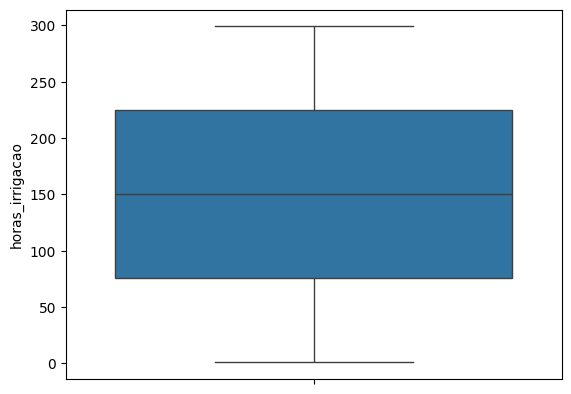

In [163]:
# Verificar se temos outliers
sns.boxplot(df_irrigacao, y='horas_irrigacao')

<Axes: ylabel='area_irrigada'>

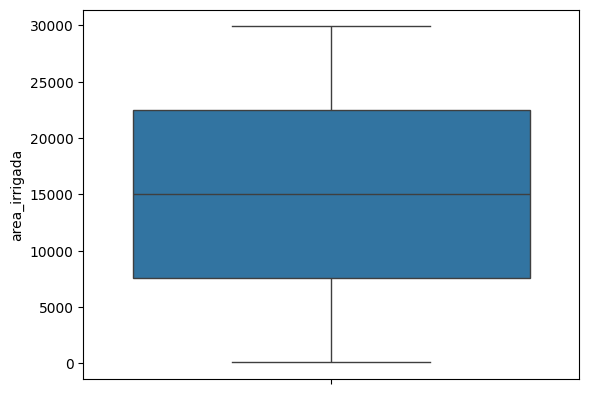

In [164]:
sns.boxplot(df_irrigacao, y='area_irrigada')

<Axes: >

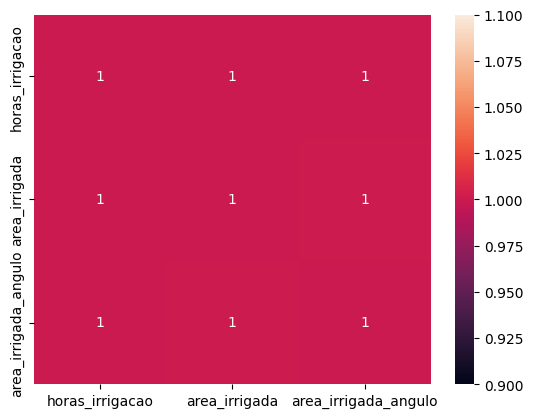

In [165]:
sns.heatmap(df_irrigacao.corr('pearson'), annot=True)

<Axes: >

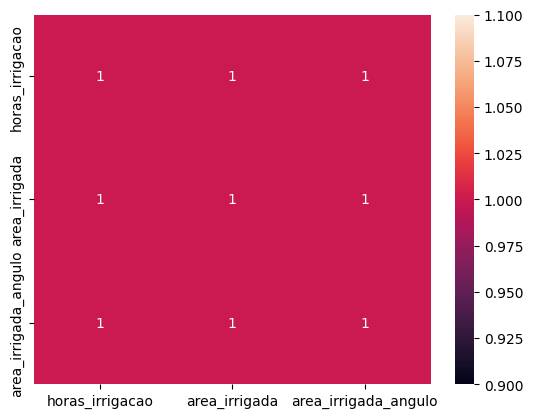

In [166]:
sns.heatmap(df_irrigacao.corr('spearman'), annot=True)

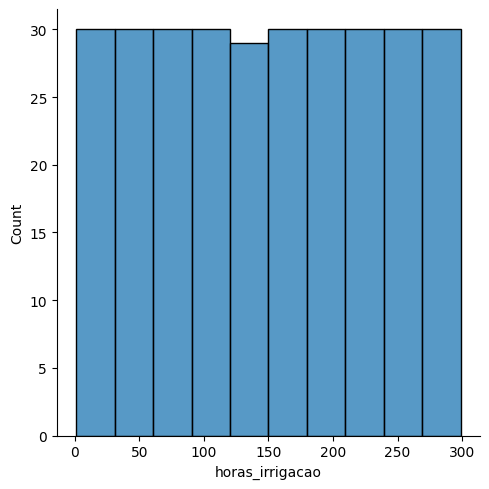

In [167]:
# Histograma das variáveis
sns.displot(df_irrigacao, x='horas_irrigacao')

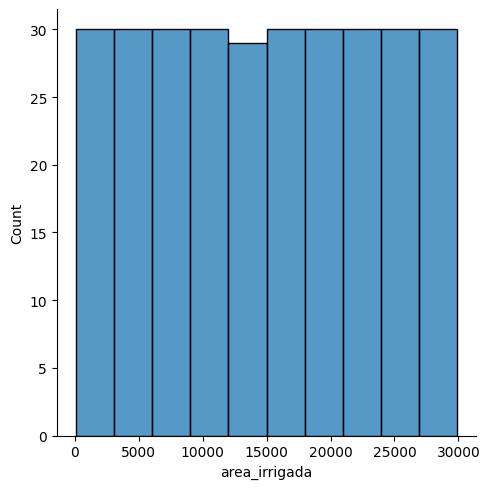

In [168]:
# Histograma das variáveis
sns.displot(df_irrigacao, x='area_irrigada')

# Treinar Modelo

In [169]:
# Divisão dos dados em treino e teste
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [170]:
# Dividir o dataset entre treino e teste

X = df_irrigacao['horas_irrigacao'].values.reshape(-1, 1)
y = df_irrigacao['area_irrigada_angulo'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()

# Treinar o modelo
print("Treinando o modelo...")
reg_model.fit(X_train, y_train)

# Imprimir a equação da reta -> y = ax + b
print(f"A equação da reta é y = {reg_model.coef_[0][0]}x + {reg_model.intercept_[0]}")

Treinando o modelo...
A equação da reta é y = 66.66666666666667x + 1.8189894035458565e-12


# Validar o modelo

In [171]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [172]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [173]:
r2 = r2_score(y_test, y_pred) 

print(f"R2 score: {r2}")

R2 score: 1.0


In [174]:
MAE = mean_absolute_error(y_test, y_pred) 

print(f"MAE: {MAE}")

MAE: 2.4310035466138894e-12


In [175]:
MSE = mean_squared_error(y_test, y_pred)

print(f"MSE: {MSE}")

MSE: 6.894248829364492e-24


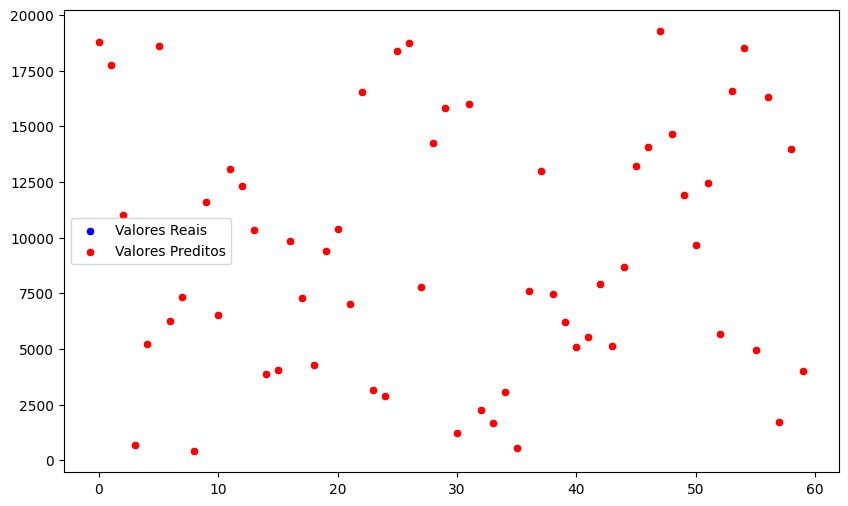

In [180]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.flatten(), color='red', label='Valores Preditos')
plt.show()

# Análise de Resíduos

In [181]:
residuos = y_test - y_pred

In [ ]:
from scipy.stats import zscore

residuos_std = zscore(residuos)

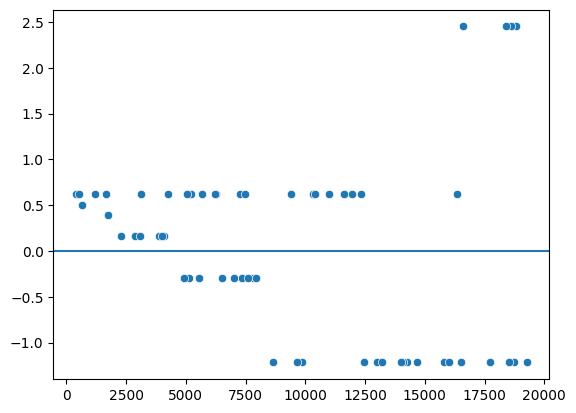

In [183]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Resíduos na escala padrão')

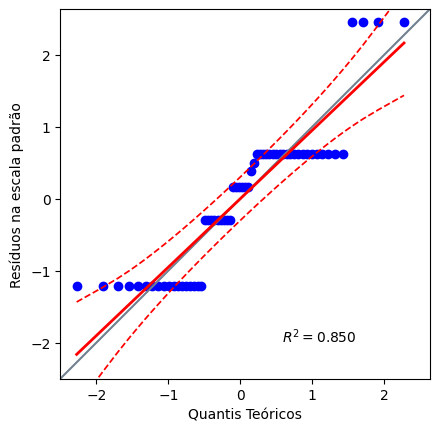

In [184]:
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

# Predição de Exemplo

In [185]:
import numpy as np

In [186]:
# Predição de exemplo
horas_exemplo = np.array([[15]])
area_predita = reg_model.predict(horas_exemplo)
print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.0000000000019


### Insights sobre a Análise

1. **Relação Linear**: A relação entre as horas de irrigação e a área irrigada por ângulo é linear, como esperado. A equação da reta obtida reflete essa relação direta.

2. **Desempenho do Modelo**: As métricas de erro (MSE e MAE) indicam que o modelo de regressão linear é adequado para prever a área irrigada por ângulo com base nas horas de irrigação.

3. **Análise de Resíduos**: A análise de resíduos mostra que os resíduos são aproximadamente normais, indicando que as suposições do modelo de regressão linear são válidas.

4. **Previsões**: O modelo pode ser usado para fazer previsões sobre a área irrigada por ângulo dada uma quantidade específica de horas de irrigação.
